<img src='images/header.png' style='height: 50px; float: left'>

## Introduction to Computational Social Science methods with Python

# Session D5. Supervised machine learning

In [Session D3. Unsupervised machine learning](3_unsupervised_machine_learning.ipynb), we have introduced Machine Learning (ML) as the ability of a computer to improve its performance on a task without being explicitly programmed and as a fundamental concept in Artificial Intelligence (AI) research which aims at giving machines intelligence. There are the two types of ML shown in ***figure 1***: unsupervised and supervised learning. Here, we focus on the latter. **Supervised** ML is about predicting outcomes for data the machine has not learned from. So what does that mean?

|<img src='images/machine_learning.png' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 1**: Definition, types, and algorithms of Machine Learning</em>|

The fundamental difference between the two types of ML is that a supervised algorithm must be trained. In supervised ML, machines are able to learn because humans train them. Both unsupervised and supervised ML algorithms are tasked to perform on the **feature matrix** $X$ of observations (in rows) and their features (also called variables, in columns). But supervised learning also requires that the observations have a **label** $y$, which means, the matrix must have a column that tells the algorithm what it is supposed to learn from the data. The label is the **outcome** of the data.

|<img src='images/inference.png' style='float: none; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 2**: Three inference strategies</em>|

Though ML algorithms can be "enormosly ambitious" (Efron & Hastie, 2016, p.xvi), the recipe for supervised learning is actually quite simple. The first thing to do is to split $X$ and $y$ into a **training set** $(X_\mathrm{train}, y_\mathrm{train})$ and a **test set** $(X_\mathrm{test}, y_\mathrm{test})$. This is followed by two inference steps. Recall from [Session D3](3_unsupervised_machine_learning.ipynb) that [Unsupervised machine learning](3_unsupervised_machine_learning.ipynb) is basically about the abductive inference strategy which aims at pattern mining, shown in the first row of ***figure 2***. Supervised learning combines induction and deduction. In the first inference step, the **training phase**, the algorithm induces a rule how $y_\mathrm{train}$ (the effect) follows from $X_\mathrm{train}$ (the cause in the second row of *figure 2*). The rule consists of a number of coefficients that parametrize a mathematical function.
%Note the causal inference logic even though supervised algorithms are not capable of making causal explanations (unless they belong to the area of [Causal AI](https://en.wikipedia.org/wiki/Causal_AI) which we do not cover here). 
In the second inference step, the **test phase**, the algorithm takes $X_\mathrm{test}$, deduces (predicts) an outcome $y_\mathrm{predicted}$ by applying the inferred rule to $X_\mathrm{test}$, and provides a score how well $y_\mathrm{test}$ is predicted by comparing it to $y_\mathrm{predicted}$ (De Veaux & Eck, 2022; McLevey, 2022, chs. 19 and 20).

To give a down-to-earth example, a very simple matrix $X$ may consist of 1,000 people (the observations) and a feature whether or not it rains where they are. $y$ may be a label whether or not the people are wet. In the inductive training phase, an algorithm may learn the rule "When it rains, people get wet." In the deductive test phase, the algorithm would predict which people are wet and compare the predicted to the actual outcome. The prediction would then probably improve when additional features are available (*e.g.*, if people use an umbrella or if there are any trigger-happy children with loaded water pistols close-by).

The algorithm used in the example may be a **Linear Regression** model if the outcome "People are wet." is a continuous variable, or it may be a **Logistic Regression** model if the outcome is a categorical variable. It may or may not come as a surprise that regression models, which belong to the methodological core of the Social Sciences and Humanities (SSH), are also part of the ML toolbox. In fact, **regression** with the task of predicting continuous outcomes is one of two families of supervised learning algorithms. **Classification** with the task of predicting categorical variables is the other family (De Veaux & Eck, 2022, ch. 3; McLevey, 2022, ch. 20).

Nevertheless, there is still a huge difference in how the same models are used in the two fields. The difference is that, in SSH, the rule that leads to an effect is not inferred in a training phase but is hypthesized (provided by theory). Such modeling aims at providing **explanations** of outcomes by interpreting statistically significant model parameters such as regression coefficients. ML, on the other hand, aims at making accurate **predictions** of outcomes without those necessarily being interpretable. ML is about accuracy, not about statistical significance (Breiman, 2001; Hofman, Watts *et al.*, 2021). In any case, ML largely expands the set of regression and classification algorithms that can be used in Computational Social Science (CSS), algorithms that are both interpretable (*e.g.*, **Decision Trees**) and uninterpretable (*e.g.*, **Gradient Boosting**) (De Veaux & Eck, 2022, ch. 5; McLevey, 2022, ch. 21).

Given the options of explanation and prediction, there is an ongoing debate about the use of ML in CSS. **Applications** include discovering new concepts and their prevalence; leveraging text, images, and videos as data sources; assess causality; and offering predictions to aid policy decisions and theory development (Molina & Garip, 2019; Grimmer *et al.*, 2021). Certainly, the interpretability of ML algorithms is important if they are used for explanations of social phenomena (Molnar, 2022).

Meanwhile, [ChatGPT](https://en.wikipedia.org/wiki/ChatGPT) and other [Large Language Models](https://en.wikipedia.org/wiki/Intelligent_agent) (LLMs) are transforming science and society in ways that were hard to envision for most people even at the time when the last three references were written. LLMs are **Deep Learning** algorithms belonging to the [neural network](https://en.wikipedia.org/wiki/Neural_network) class that mimic the architecture of biological brains and have learned to understand and generate natural language in sophisticated ways (De Veaux & Eck, 2022, ch. 6; McLevey, 2022, ch. 22).

The size of the training dataset is crucial in ML. LLMs are so successful in providing meaningful output because they have trained on very large quantities of human-generated text. This allows them to disambiguate words based on their context. The virtue of highly accurate ML algorithms trained on large datasets is that they can make predictions from patterns that barely distinguish themselves from noise. This virtue can turn into a problem when you realize that society is inherently noisy. John von Neumann famously [said](https://en.wikipedia.org/wiki/Von_Neumann%27s_elephant): "With four parameters I can fit an elephant, and with five I can make him wiggle his trunk." Applied to our context, this means that ML models must be carefully tuned to avoid using too few parameters and miss the pattern (**underfitting**) and to avoid using too many parameters and fit the noise (**overfitting**). Read [this page](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) for an intuitive example.

To identify such problems of underfitting and overfitting, it is common practice to validate the model during the training phase. This can be done by splitting off a validation set from the training set or by performing **cross-validation** which fits multiple models on varying subsets of the training set and validates them on the remaining subsets. Finally, it is an iron rule that no data from the test set is used in the training/validation phase. In ML, such **data leakage** is avoided at all costs because the goal is to build models that generalize well and not models that memorize data well (Efron & Hastie, 2016, ch.12; De Veaux & Eck, 2022).

Isn't it interesting that the one thing to avoid in ML is common practice in SSH? After all, scholars in SSH do not split their data into training and testing data. Of course the reason is that they are interested in explanation as opposed to prediction. But since prediction yields models that generalize better, they are embraced in CSS (Hofman, Watts *et al.*, 2021).

The dataset from the [Varieties of Democracies](https://v-dem.net/) (V-Dem) project which we have used in [Session D3: Unsupervised machine learning](3_unsupervised_machine_learning.ipynb) is also well-suited to teach supervised learning tasks (McLevey, 2022, ch.20). For this purpose, McLevey (2022, ch.20) has extended it by a continuous variable of a country's internet freedoms. The difference between explanation and prediction is mirrored in the packages that Python provides. The one package for ML is [scikit-learn](https://scikit-learn.org/). But it does not provide tools for significance testing. Statistical modeling is the turf of [statsmodels](https://www.statsmodels.org/).

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how to perform supervised learning and how it differs from the way algorithms are used in SSH. The V-Dem dataset will serve to demonstrate all algorithms in this session. Subsession **D5.1** focuses on explanation. We will demonstrate how the traditional way of statistical modeling can be done in statsmodels. We will guide you through Linear and Logistic Regression and how coefficients and significance scores can be obtained. The major part of the session, subsession **D5.2**, focuses on prediction and the scikit-learn package. You will learn about the order of operations (training, cross-validation, and testing), evaluation metrics, how to identify overfitting, and how to avoid it using model tuning techniques. In terms of algorithms, we will cover Linear Regression, Deep Learning, Decision Trees, and Gradient Boosting, first for regression and then for classification.
</div>

## D5.1. Explanation (statistical modeling)

The V-Dem subset for the year 2019 consists of 176 countries described by 23 indicators or variables, five latent low-level indices, a high-level index, a continuous numerical measure of a nation's internet freedoms, and a four-part regime classification derived from the indices and indicators:

In [8]:
import pandas as pd

In [9]:
vdem = pd.read_csv(filepath_or_buffer='../data/vdem.tsv', sep='\t', encoding='utf-8', low_memory=False)
vdem = vdem.set_index('country_name')
vdem

,total_score,v2x_regime,v2x_polyarchy,v2x_freexp_altinf,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,...,v2elembaut,v2elembcap,v2x_elecoff,v2lgbicam,v2lgello,v2lginello,v2expathhs,v2exdfcbhs,v2exdfdmhs,v2exhoshog
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,1.0,0.353,0.696,0.327,-0.392,0.420,1.337,1.497,1.532,...,-0.569,-0.560,1.000,2.0,100.0,0.0,7.0,-0.588,1.005,1.0
Albania,NaN,1.0,0.486,0.639,-0.039,0.526,0.476,1.086,0.438,-0.604,...,0.701,0.353,1.000,1.0,100.0,0.0,6.0,-1.225,-1.068,0.0
Algeria,NaN,1.0,0.287,0.521,-1.063,0.476,-0.122,-0.096,0.810,0.469,...,-0.931,-1.228,1.000,2.0,100.0,0.0,7.0,1.495,1.421,0.0
Angola,64.0,1.0,0.365,0.653,1.026,0.552,0.997,0.855,-0.317,1.255,...,-0.939,-0.772,1.000,1.0,100.0,0.0,6.0,1.629,1.005,1.0
Argentina,72.0,2.0,0.771,0.843,1.274,0.948,1.320,1.419,1.525,0.646,...,1.614,1.624,1.000,2.0,100.0,0.0,7.0,2.257,1.879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,24.0,0.0,0.149,0.137,-1.463,-1.008,-1.360,-2.123,-2.036,-1.439,...,-1.228,1.475,0.000,1.0,100.0,0.0,6.0,-0.821,-1.808,0.0
Yemen,NaN,0.0,0.119,0.196,-2.238,-1.355,-0.593,-0.153,-0.613,-1.161,...,-1.278,-0.697,0.000,2.0,100.0,0.0,1.0,0.942,1.507,0.0
Zambia,58.0,1.0,0.338,0.648,-0.983,0.212,0.588,0.752,1.352,0.406,...,0.402,-1.696,0.970,1.0,94.0,0.0,7.0,1.915,1.638,1.0


In [10]:
# high-level index
index = ['v2x_polyarchy']

# low-level indices
indices = ['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff']

# low-level index labels
indices_labels = ['Freedom of expression', 'Freedom of association', 'Share of pop w/ suffrage', 'Clean elections', 'Elected officials']

# indicator variables
indicators = ['v2mecenefm', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2merange', 'v2mecrit', 'v2cldiscm', 'v2cldiscw', 'v2clacfree', 'v2psparban', 'v2psbars', 'v2cseeorgs', 'v2csreprss', 'v2elsuffrage', 'v2elembaut', 'v2elembcap', 'v2lgbicam', 'v2lgello', 'v2lginello', 'v2expathhs', 'v2exdfcbhs', 'v2exdfdmhs', 'v2exhoshog']

# indicator labels
#indicators_labels = []

CHANGE TEXT, NOT JUST FORETASTE, BUT TOWARDS HYPTHESIS TESTING

As a foretaste of linear regression, we can plot pairwise correlations, for example, among the five indices, and display regression lines:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

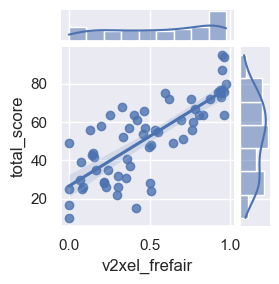

In [71]:
sns.jointplot(
    data = vdem, 
    x = 'v2xel_frefair', 
    y = 'total_score', 
    height = 3, 
    kind = 'reg'
)
plt.show()

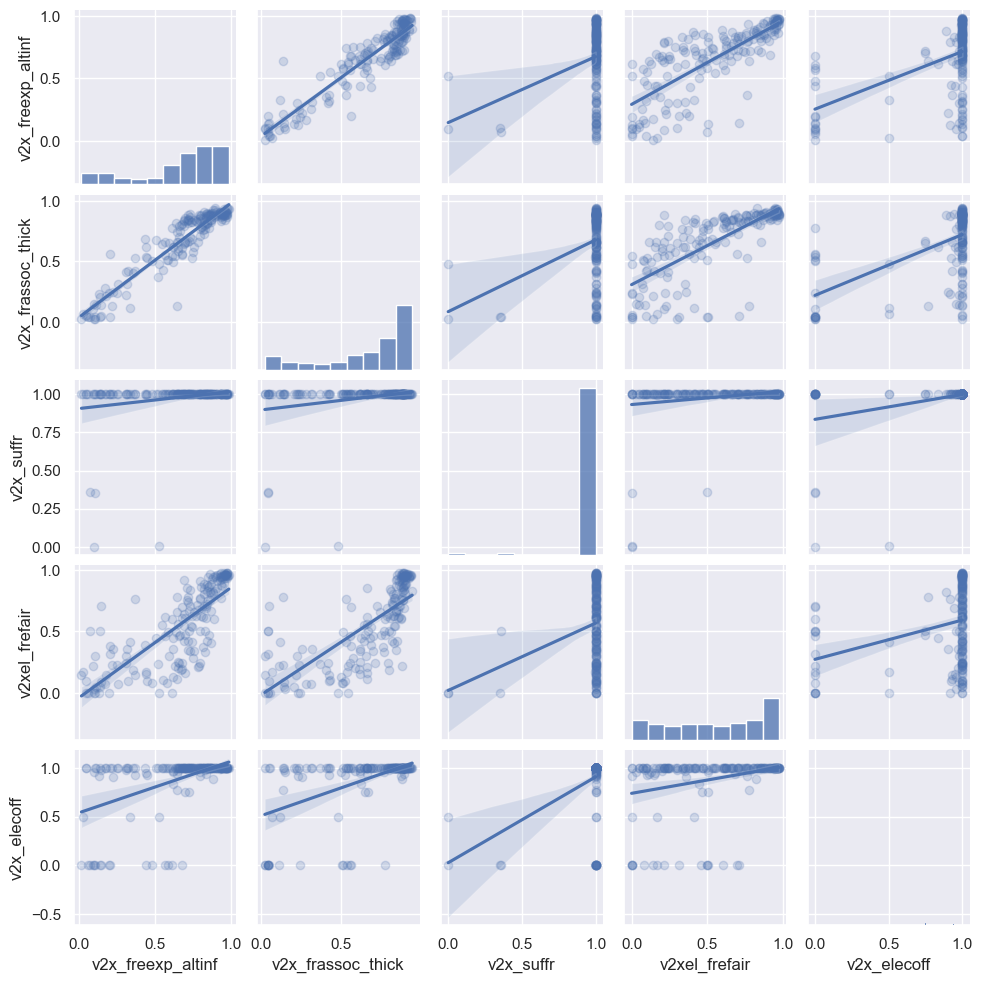

In [68]:
fig = sns.pairplot(
    data = vdem[indices], 
    height = 2, 
    kind = 'reg', 
    diag_kind = 'hist', 
    plot_kws = {'scatter_kws': {'alpha': .2}}
)
#fig.savefig('results/...vdem_fh_pairplot.png')
plt.show()

In [49]:
indices_labels

['Freedom of expression',
 'Freedom of association',
 'Share of pop w/ suffrage',
 'Clean elections',
 'Elected officials']

### D5.1.1. Linear regression

Statistical modeling as it is done in SSH is about hypothesis testing. In **statistical hypothesis testing**, data on $X$ and $y$ is used to decide if a rule has explanatory power. For example, we may be interested in explaining the amount of internet freedom in a country. 

- hypothesis and significance testing
- equation
- linearity: 
- normal distribution
- error model: i.i.d.
- sample

sklearn does not report p values. Use: statsmodels

- generalized linear model: linear and logistic regression

link function etc

CHANGE TEXT, WE TEST AN HYPOTHESIS

In this statistical exercise, we will predict 'total_score', a continuous numerical measure of a nation's internet freedoms, by the five low-level indices. First, remove missing values because we do not have the response variable for all countries:

In [17]:
vdem_regression = vdem[~vdem['total_score'].isnull()]

(63, 31)

Now construct the feature matrix $X$ for regression directly from the dataframe:

In [19]:
X_regression = vdem_regression[indices].to_numpy()

$X$ has 63 rows and 5 columns:

In [20]:
X_regression.shape

(63, 5)

The numerical response variable $y$ is:

In [10]:
y_regression = vdem_regression[['total_score']].to_numpy()

In [21]:
from statsmodels.api import add_constant, OLS

In [12]:
# add column of ones to model the intercept
X_regression_sm = add_constant(X_regression)

In [13]:
# fit model to data
ols_sm = OLS(endog=y_regression, exog=X_regression_sm) # equivalent to fit_intercept=True in sklearn (https://stackoverflow.com/questions/70179307/why-is-sklearn-r-squared-different-from-that-of-statsmodels-when-fit-intercept-f/70180217#70180217)
ols_sm = ols_sm.fit()

In [14]:
ols_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     52.10
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           5.07e-20
Time:                        14:12:37   Log-Likelihood:                -225.51
No. Observations:                  63   AIC:                             463.0
Df Residuals:                      57   BIC:                             475.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5154      7.796      2.760      0.008       5.903      37.127
x1            19.8931     12.941      1.537      0.130      -6.021      45.807
x2            26.2387     13.594      1.930      0.059      -0.983      53.461
x3           -10.9672      8.792     -1.247      0.217     -28.572       6.638
x4            18.4545      5.691      3.243      0.002       7.058      29.851
x5             6.2517      3.993      1.566      0.123      -1.744      14.248
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.204
Skew:                          -0.291   Prob(JB):                        0.548
Kurtosis:                       3.345   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- model fit r^2

In [15]:
# goodness of fit (R^2)
ols_sm.rsquared.round(3)

0.82

In [16]:
# intercept and coefficients
ols_sm.params.round(4)

array([ 21.5154,  19.8931,  26.2387, -10.9672,  18.4545,   6.2517])

In [17]:
# significance scores
ols_sm.pvalues.round(3)

array([0.008, 0.13 , 0.059, 0.217, 0.002, 0.123])

### D5.1.2. Logistic regression

In [18]:
import numpy as np

In [19]:
X_classification = vdem[indices].to_numpy()
X_classification_sm = add_constant(X_classification)
y_classification_binary = np.where(vdem['v2x_regime'] <= 1, 0, 1).copy()

In [20]:
from statsmodels.api import Logit

In [21]:
logit_sm = Logit(y_classification_binary, X_classification_sm)
logit_sm = logit_sm.fit()

         Current function value: 0.000001
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
logit_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  176
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                   1.000
Time:                        14:12:37   Log-Likelihood:            -0.00019723
converged:                      False   LL-Null:                       -121.81
Covariance Type:            nonrobust   LLR p-value:                 1.282e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -324.3409   4.31e+05     -0.001      0.999   -8.46e+05    8.45e+05
x1           256.0682   1.53e+04      0.017      0.987   -2.97e+04    3.02e+04
x2           330.2626   5.63e+04      0.006      0.995    -1.1e+05    1.11e+05
x3          -310.1196   4.32e+05     -0.001      0.999   -8.48e+05    8.47e+05
x4           350.5838   4.82e+04      0.007      0.994   -9.42e+04    9.49e+04
x5            14.9778   4095.179      0.004      0.997   -8011.425    8041.381
==============================================================================

Possibly complete quasi-separation: A fraction 0.99 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [23]:
# goodness of fit
logit_sm.prsquared.round(3)

1.0

In [24]:
# intercept and coefficients
logit_sm.params.round(4)

array([-324.3409,  256.0682,  330.2626, -310.1196,  350.5838,   14.9778])

In [25]:
# significance scores
logit_sm.pvalues.round(3)

array([0.999, 0.987, 0.995, 0.999, 0.994, 0.997])

## D5.2. Prediction

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

### D5.2.1. Regression

- Out-of-sample testing
- Cross validation
- Data leakage
- Feature selection
- Over- and underfitting

- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


In [26]:
# choose which predictors to use
predictors = indices # indices or indicators

In [27]:
## get array of predictor variables
#X_regression = vdem_regression[predictors].to_numpy()

In [28]:
## get numerical response variable
#y_regression = vdem_regression[['total_score']].to_numpy()

##### Splitting data into sets to train and test the model

For developing machine learning models we need to split our data; some for training the model and others for testing and validating it. Without splitting, our model will simply learn to retrodict data that it has already seen, rather than predicting the data it has not.

Every time you split your data, you remove some of the information the model can learn from. If you remove too much, a full train/validation/test split might impact your model’s performance in a negative way.

Fortunately, we can sidestep this issue without sacrificing any principles. The process follows these steps:
1. Split your data into train and test sets. All of the training data will be fully available
to train on. The test set will not be used in any way until a final model has been
selected.
2. Use cross-validation (explained later in this section) to produce an optimal set of training
hyperparameters.
3. Select the best cross-validated model and evaluate using test data.

We can complete the first step in Sklearn using `train_test_split()` function. Below, we separate our data into two objects: `X` and `y`. Doing so brings us inline with a long-standing convention that the predictor data is stored in an upper-case X, indicating a matrix of covariates, or **design matrix**. The lower-case y, or the **target**, indicates a vector of outcome values. The machine learning models we employ will
learn how to predict the y values using the X values.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# split data into training and test sets
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(
    X_regression, 
    y_regression, 
    test_size = .33, 
    random_state = 42, 
    shuffle = True
)

#### Linear Regression

The linear regression model is about as transparent and interpretable as machine
learning gets. Linear regression models are algorithmically simple, and since they
have been widely used in the social sciences, they're rather easier to begin with if you don't have much experience with machine learning.

In an OLS regression, we model an outcome of interest (y) as a
function of a weighted sum of input features (X) and random error. The *weights* in a
linear model are the coefficients, which are *learnt* during training. For example, we
might predict the degree of internet freedom in a country as a linear function of some other
regime characteristics.

In the context of machine learning, the goal with a regression model such as this is to
find a line (if you have one feature), a plane (if you have two features), or a hyperplane
(if you have three or more features) that best fits the data. When we fit our model to the
training data, it *learns* the best value for the intercept and slope by minimizing the
mean-squared error (MSE), which is the sum of the squared differences between each
observed value in the data and the predicted value from the model.

In order to do this, we first need to create an OLS object as follows, and then learn the model parameters by fitting the model to our training data:

##### Fitting model on training set

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# create LinearRegression object and regress y on X
lr = LinearRegression(fit_intercept=True)
lr.fit(X=X_regression_train, y=y_regression_train)

LinearRegression()

In [33]:
# get intercept
lr.intercept_.round(4)

array([16.5186])

In [34]:
# get coefficients
lr.coef_.round(4)

array([[28.2638, 15.5046, -3.5282, 20.1488,  4.1153]])

In [35]:
# get intercept and coefficients
np.concatenate([lr.intercept_.round(4), lr.coef_.round(4)[0]])

array([16.5186, 28.2638, 15.5046, -3.5282, 20.1488,  4.1153])

The values differ from those obtained in the explanation subsection because they are inferred just from the training data!

##### Evaluation metrics

We can check to see how well the model managed to to fit our data using R^2 score. It measures how much of the variance in the dependent variable can be explained by the model; a score of 1 indicates a perfect fit.

In [36]:
# get coefficient of determination (model fit)
lr_score_train = lr.score(X=X_regression_train, y=y_regression_train).round(3)
lr_score_train

0.817

Comparison with Statsmodels: 0.820.

0.817 is a pretty high score for R^2, it means that our trained model is capable of accounting for roughly 82% of the variance in the training data with just five parameters. This could indicate overfitting to the training data, meaning that our model can perform very well on the data it has learned from, but it's not that capable when encountering new data. In order to examine that, we will use cross-validation.

**Cross-validation** builds on the intuition behind training and testing sets, but does so
repeatedly, training and assessing models each time. The most common type of cross-
validation in machine learning is **k-fold cross-validation**, which splits our data into k
number of equally sized folds. We then use these folds as a sliding window of training and
validation splits. If we are doing fivefold cross-validation, we segment our dataset into
five folds and fit and assess five models.

The first model is trained using the data
contained in folds 2 to 5 and then validated on the data on in fold 1. The second model
is trained on the data in fold 1 and folds 3 to 5 and validated on the data in fold 2, and
so on. The model evaluation scores are computed for all five and then examined
together, or summarized as an average. If we are using accuracy as our evaluation
score, ideally we would see that all five accuracy measures are high and reliable; if
there is a lot of variation in our accuracy scores, then the model is likely over-relying on
characteristics of data in some of the folds.


Putting OLS and CV together: The code below is going to produce five scores from the five training–validations splits it produces internally. We’re primarily interested in the stability of the score (how much it
fluctuates between the folds).

If our model is consistent in its performance but not as accurate as we would like, then
we have to improve our analysis. We might improve the quality of the input data or
make improvements to the model itself. If we see a lot of variation in the model accuracy
on different folds, then we have a different problem and we need to change how we
segment our data into folds.

In [37]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

shufflesplit = ShuffleSplit(n_splits=5, test_size=.2, random_state=42)

In [38]:
# regress y on X using five folds and shuffled splits
lr_score_cv = cross_val_score(
    estimator = LinearRegression(fit_intercept=True), 
    X = X_regression_train, 
    y = y_regression_train, 
    scoring = 'r2', 
    cv = shufflesplit
)
lr_score_cv.round(3)

array([  0.9  ,   0.853,   0.765,   0.839, -73.232])

Three of the scores are excellent, falling somewhere in the high 0.7 to high 0.8 range. But one score is very low and one is highly negative. This is because, when fitting the second fold, RSS >> TSS.
Our model’s performance seems to depend on which
data it trains on (and, equivalently, the data upon which it must validate itself).

The gap between our high and low cross-validation scores might indicate that our data
is ordered or clustered in some way. It could be that our observations appear in
alphabetical order by country name, or something similar. In such cases, it can be
useful to shuffle the data before we split it to ensure that we are not simply rolling over
one group at a time. Doing this is as simple as using Sklearn’s `ShuffleSplit()`,
which takes two arguments: **the number** (supplied as an integer) or **percentage**
(supplied as a float) of instances to sample for the training and test sets, and the
**number of iterations**, or **splits**, to perform. You can then pass the resulting object into
`cross_val_score`’s cv argument, and Sklearn smoothly handles the rest:

As you can see, by simply randomizing the order in which our observations appear, we were able to smooth out our R^2 scores.

Cheating on the Test: Now let’s take the mean value across all folds and use that as a point of comparison:

In [39]:
# get average coefficient of determination
lr_score_cv.mean().round(3)

-13.975

In [40]:
# get standard deviation of the coefficient of determination
lr_score_cv.std().round(3)

29.628

The score from our cross-validation (0.610) is ... lower than the one we ...
received by training on the training dataset (0.850), but that’s to be expected. We can
think of the cross-validation score as a *validation score* in the sense that it measures
our model’s performance on data it wasn’t able to train on (averaged across five
different configurations of that set-up). Our original OLS model, by comparison, was
able to train on the entire dataset at once; its score represents how well it fit the data it
trained on.

##### Evaluating model on test set

Now there's only one step left: testing the model on the test data. Normally, assessing your validated model’s performance on test data should only be done **once you are completely finished developing your models**. If you use your test data to help you improve your model, you’re causing *data leakage*, wherein knowledge your model shouldn’t have access to is being used to improve it. Here, we will just complete the further steps for the sake of indicating how it's done:

In [41]:
# predict response variable
y_lr_pred = lr.predict(X=X_regression_test)

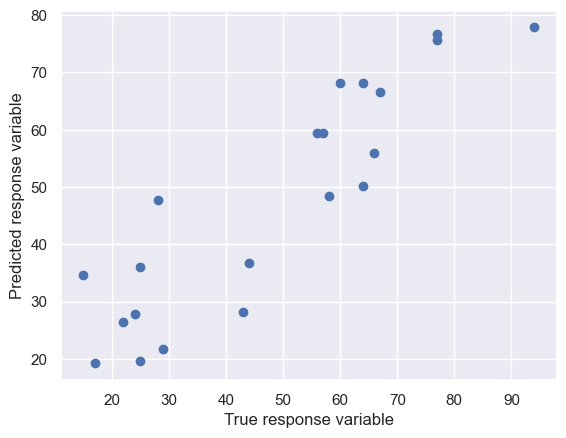

In [42]:
# plot predicted against true response variable
plt.scatter(x=y_regression_test, y=y_lr_pred)
plt.xlabel('True response variable')
plt.ylabel('Predicted response variable')
plt.show()

In [43]:
lr_score_test = lr.score(X=X_regression_test, y=y_regression_test).round(3)
lr_score_test

0.807

... the training score (0.850) is substantially higher than the test score (0.667), which is an indication
that our model is overfitting the training data!

In [44]:
vdem_regression_scores = pd.DataFrame(index=['Training', 'Cross-Validation', 'Test'])
vdem_regression_scores.loc[:, 'Linear'] = [lr_score_train, f'{lr_score_cv.mean().round(3)} ({lr_score_cv.std().round(3)})', lr_score_test]
vdem_regression_scores

,Linear
Training,0.817
Cross-Validation,-13.975 (29.628)
Test,0.807


A remedy to the overfitting issue is often to make your model *less powerful* or to use some kind of regularization technique. Remember, though, that under normal circumstances, we wouldn’t be able to see our model’s test score. In an attempt to wean ourselves off of test scores, we’re going to spend the rest of this section creating
regularized models without examining the test scores (we’ll save that for the very end).

#### Regularization via Ridge Regression

We recognize an overfitting problem when the quality of a model drops when making
predictions on the test set. To address this, we could provide some additional
constraints to prevent our model from learning too much from the training data. One
method is ridge regression, which uses L2 regularization to make the coefficients as
close to 0 as possible while still making good predictions. In effect, L2 regularization
applies a penalty to model parameters that scales with their magnitude. This means that
your model is incentivized to keep each parameter value as small as possible. This
tension is useful for preventing overfitting.

To fit a ridge regression model, we follow the same process as before, only unlike our
OLS model, ridge regression accepts one important hyperparameter: **alpha**. The
alpha hyperparameter determines the strength of the regularizing penalty the ridge
regression applies to each of our parameters; the higher it is, the stronger it is. It
defaults to a value of 1, which is generally a good starting point. We’ll start by creating a
fresh set of training and test data (with a new random seed):

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# standardize variables
X_regression_z = StandardScaler().fit_transform(X_regression)
y_regression_z = np.ravel(StandardScaler().fit_transform(y_regression))

In [47]:
# split data into training and test sets
X_regression_z_train, X_regression_z_test, y_regression_z_train, y_regression_z_test = train_test_split(
    X_regression_z, 
    y_regression_z, 
    test_size = .33, 
    random_state = 42, 
    shuffle = True
)

In [48]:
from sklearn.linear_model import Ridge

In [49]:
# regress y on X five times using five folds and shuffled splits
ridge_score_cv = cross_val_score(
    estimator = Ridge(alpha=1., fit_intercept=False), 
    X = X_regression_z_train, 
    y = y_regression_z_train, 
    scoring = 'r2', 
    cv = shufflesplit
)
ridge_score_cv.round(3)

array([0.897, 0.867, 0.806, 0.851, 0.942])

In [50]:
ridge_score_cv.mean().round(3)

0.872

We can see that the use of ridge regression has left us very slightly better off than our
original OLS regression, but not by much. It might be possible to improve the cross-
validation scores by modifying the `alpha` parameter, but let’s try another regularization.

#### Regularization via Lasso Regression

We could use L1 regularization, which penalizes coefficient values that are close to 0
much more harshly than the comparatively light treatment that L2 regularization offers.
The result is that the model is forced to use only a subset of the available features,
which it selects automatically. All other coefficients are set to 0. This approach is called
lasso regression. As with ridge, lasso takes an **alpha** parameter that determines
how aggressive the regularization is. If we have an underfitting problem, then we want
to decrease a to soften the constraints and let the model learn more from the training
data. Conversely, if we have an overfitting problem, we want to increase `alpha` to more
aggressively push the coefficients towards 0 and learn less from the training data.
Creating a lasso regression model is the same process as before:

In [51]:
from sklearn.linear_model import Lasso

In [52]:
# regress y on X five times using five folds and shuffled splits
lasso_score_cv = cross_val_score(
    estimator = Lasso(alpha=1., fit_intercept=False), 
    X = X_regression_z_train, 
    y = y_regression_z_train, 
    scoring = 'r2', 
    cv = shufflesplit
)
lasso_score_cv.round(3)

array([-0.136, -0.135, -0.035, -0.087, -0.003])

In [53]:
lasso_score_cv.mean().round(3)

-0.079

Our cross-validation R^2 score with default parameter settings (alpha=1) is zero, which means, ...

We might be able to squeeze a bit more life out of our regularized models by tweaking
the `alpha` hyperparameter. If not specified, `alpha` defaults to 1. As `alpha` increases, the
model becomes more simple, more constrained, and more regularized. As it decreases,
the model becomes more complex, less constrained, less regularized. Let’s compare the results of a series of ridge and lasso regressions on this data using
different `alpha` parameters. We will define a set of `alpha` values, estimate a series of
ridge and lasso regressions, and then plot their R^2 scores for comparison:

In [54]:
alphas = np.logspace(-4, 4, 100)

ridge_scores_cv = []
lasso_scores_cv = []

for alpha in alphas:
    ridge_scores_cv.append(cross_val_score(estimator=Ridge(alpha=alpha, fit_intercept=False), X=X_regression_z_train, y=y_regression_z_train, cv=shufflesplit).mean())
    lasso_scores_cv.append(cross_val_score(estimator=Lasso(alpha=alpha, fit_intercept=False), X=X_regression_z_train, y=y_regression_z_train, cv=shufflesplit).mean())
    
regressor_scores_cv = pd.DataFrame(
    zip(alphas, ridge_scores_cv, lasso_scores_cv), 
    columns = ['alpha', 'Ridge Regression', 'Lasso Regression'])

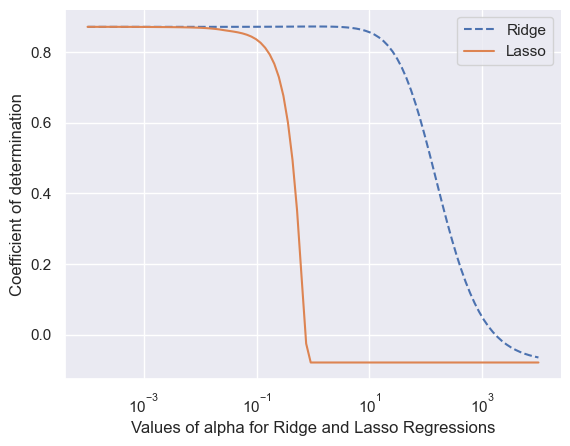

In [55]:
fig, ax = plt.subplots()
#ax.axhline(lr_score_cv.mean(), label='Linear', linestyle='dotted', color='darkgray')
sns.lineplot(x='alpha', y='Ridge Regression', data=regressor_scores_cv, label='Ridge', linestyle='dashed')
sns.lineplot(x='alpha', y='Lasso Regression', data=regressor_scores_cv, label='Lasso', linestyle='solid')
ax.set(xlabel='Values of alpha for Ridge and Lasso Regressions', ylabel='Coefficient of determination', xscale='log')
sns.despine()
ax.legend()
plt.show()

As you can see, all three of the model types we’re testing – ridge, lasso, and OLS
– converge as `alpha` approaches 0 (we didn’t actually fit any of the models with an
`alpha` of zero, since the models only accept non-negative, non-zero values for `alpha`),
but rapidly diverge thereafter. As `alpha` increases, lasso regression’s performance
increases, falters, and begins a nosedive as `alpha` approaches 0.5. Ridge regression
rises and falls like lasso regression, but over a much larger scale of `alpha`.

Although the peaks of ridge and lasso are close, it would appear that ridge regression
with a haphazardly optimized `alpha` parameter is our best fit for this model. We’ll
retrieve that value of `alpha`, fit a new model, and interpret the results:

In [56]:
max(ridge_scores_cv)

0.8723494818044994

In [57]:
max(lasso_scores_cv)

0.8713636512113847

In [58]:
alpha_best = alphas[ridge_scores_cv.index(max(ridge_scores_cv))]
alpha_best

1.0974987654930568

#### Ridge regression with optimized alpha parameter

Let’s use this to fit a ridge regression and get the coefficients:

In [59]:
# create Ridge object and regress y on X
ridge_best = Ridge(alpha=alpha_best, fit_intercept=False).fit(X=X_regression_z_train, y=y_regression_z_train)

In [60]:
# get training score
ridge_best_score_train = ridge_best.score(X=X_regression_z_train, y=y_regression_z_train).round(3)

# get cross-validation score
ridge_best_score_cv = cross_val_score(estimator=Ridge(alpha=alpha_best, fit_intercept=True), X=X_regression_z_train, y=y_regression_z_train, scoring='r2', cv=shufflesplit)

# get test score
ridge_best_score_test = ridge_best.score(X=X_regression_z_test, y=y_regression_z_test).round(3)

In [61]:
vdem_regression_scores.loc[:, 'Ridge (best)'] = [ridge_best_score_train, f'{ridge_best_score_cv.mean().round(3)} ({ridge_best_score_cv.std().round(3)})', ridge_best_score_test]
vdem_regression_scores

,Linear,Ridge (best)
Training,0.817,0.817
Cross-Validation,-13.975 (29.628),0.86 (0.057)
Test,0.807,0.808


#### Multi-Layer Perceptron Regression

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
from sklearn.neural_network import MLPRegressor

# create MLPRegressor object and regress y on X
mlpr = MLPRegressor(random_state=42).fit(X=X_regression_z_train, y=y_regression_z_train)

# get scores
mlpr_score_train = mlpr.score(X=X_regression_z_train, y=y_regression_z_train).round(3)
mlpr_score_cv = cross_val_score(estimator=MLPRegressor(random_state=42), X=X_regression_z_train, y=y_regression_z_train, cv=shufflesplit)
mlpr_score_test = mlpr.score(X=X_regression_z_test, y=y_regression_z_test).round(3)

In [64]:
vdem_regression_scores.loc[:, 'Multi-Layer Perceptron'] = [mlpr_score_train, f'{mlpr_score_cv.mean().round(3)} ({mlpr_score_cv.std().round(3)})', mlpr_score_test]
vdem_regression_scores

,Linear,Ridge (best),Multi-Layer Perceptron
Training,0.817,0.817,0.839
Cross-Validation,-13.975 (29.628),0.86 (0.057),0.844 (0.058)
Test,0.807,0.808,0.783


In [65]:
# interpretibility of MLPRegressor
mlpr.coefs_

[array([[-9.36274409e-02,  1.77616014e-01,  1.36890635e-01,
          1.21861818e-02, -2.00695197e-01, -1.71183603e-01,
         -2.12504182e-01,  1.37944910e-01,  9.50838519e-02,
          1.45124759e-01, -2.60497740e-01,  2.71598145e-01,
          1.99206827e-01, -1.69921395e-01, -1.35611339e-01,
         -1.76782132e-01, -1.20543788e-01, -3.34185589e-02,
          4.15725908e-03, -8.65853484e-02,  1.41290033e-02,
         -2.05132661e-01, -1.09839663e-01, -1.03489353e-01,
          2.36963375e-02,  1.01348668e-01, -1.74476493e-01,
          4.82196461e-02,  1.20217136e-02, -2.49480341e-01,
          9.22620697e-02, -1.17808808e-01, -2.36000837e-01,
          3.29060306e-01,  1.77433664e-01,  1.23128034e-01,
         -4.31845301e-02, -1.66018938e-01,  6.75264191e-02,
          9.09945660e-03, -2.17414011e-01, -1.43810236e-02,
         -2.56293380e-01,  1.65187346e-01, -1.45097189e-01,
          1.16476213e-01, -3.44309962e-02,  4.08920546e-02,
          5.43064947e-02, -1.99617562e-0

#### Decision Tree Regression

Decision trees can be used for both classification and regression tasks. Here we will focus on a classification example, but the process is more or less the same for the regression tasks.

A decision tree is in fact a directed network that starts with a single node including every instance in the data set. Beginning from that node, it *asks* a series of *questions* in order to find the correct labels in a classification problem, or the correct values in a regression problem. A good decision tree should ask the most informative questions in each step; we will see how it can be done shortly. The questions will always concern the value for
some specific feature for each instance, like *Does Canada hold free and fair
elections?* or *Is Canada’s score for freedom of the press higher than the median
score?*

Every time the model asks a question, a node containing some subset of instances in
our dataset splits off into two new nodes. Depending on the answer to the question,
each observation moves from the parent node into one of the two child nodes. This
process continues until 
- All of the observations contained in a node share the same value for the outcome you want the model to be able to predict, or
- Your tree model runs out of room to ask more questions.

The path from the root node
(every instance in the dataset) to each leaf in the tree constitutes a *rule*. We can collect
all of these rules into a single hierarchical rule base that is relatively easy for humans to
interpret and understand.

Now that we know the basics, it’s time to answer a critical question: *How does the
model decide which question to ask next?* How does it know what the *most informative*
question is? The most common method is to use the concept of entropy from
information theory. In information theory, entropy is a measure of how much information
something contains, expressed in terms of uncertainty.

To use a simplified example, let’s say we want to figure out which of the nations in the
VDEM dataset are democracies. If you think elections are all you need to be considered
a democracy, then you could just ask one question for each case – do they hold
elections? *However*, not all elections are the same, and democracies are about much
more than elections. So you keep asking questions until you are confident you can
make a good judgement. The more questions you need to ask to arrive at a confident
judgement, the more accurate your classification of the observations into "democracies"
and "autocracies" will be. The more purely separated those two classes become, the
lower the "entropy" in your model. In the context of a decision tree analysis, the model
will *always* ask the question that will result in the biggest decrease in entropy, usually
expressed in terms of **information gain**, which quantifies the decrease in entropy that
resulted from asking the question.

At this point, there shouldn’t be much doubt about how easily the VDEM dataset we’ve
been using up until here can be classified; nevertheless, we are going to use it
here again. We are not going to do so because it will provide us with a better
classification (we already achieved very good scores using a logistic regression) but
rather because the resultant decision tree model will allow us to easily see what
information the model finds most useful when deciding whether a nation is an autocracy
or a democracy.

As usual, we will start by splitting our dataset into a matrix `X` and and outcome vector `y`:

The technique we’re using to convert the 4-point `v2x_regime` scale into a binary
variable is identical to the one we employed in the previous section.
With `X` and `y` created, we can create our training and test sets, and then create and fit
our decision tree classifier using cross-validation (in much the same way as we did in
the previous section; go back to it for more details on cross-validation).

In [66]:
from sklearn.tree import DecisionTreeRegressor

# create DecisionTreeRegressor object and regress y on X
dtr = DecisionTreeRegressor(random_state=42).fit(X=X_regression_train, y=y_regression_train)

# get training score
dtr.score(X=X_regression_train, y=y_regression_train).round(3)

1.0

##### What About Overfitting?

Decision trees are also prone to overfitting. The tree grows bigger with every question, and by the time we’ve reached the leaves, we know
everything we need to know to make predictions that are 100% right 100% of the time -*for the data we trained the model on*. This extreme overfitting is sometimes called
**memorizing** the training data. We don’t want that!

In order to get a sense of what our tree is doing under the hood, the below picture
represents our decision tree. You start at the top node, which contains all of the
observations (countries in this case). The top line in that node (and every non-leaf node
in the remainder of the tree) indicates the rule it will use to split the data. All of the
countries for which that statement is true will travel along the **True** path for further
subdivision. All of the nations for whom this condition does not apply travel along the
**False** path.

In [67]:
import os

directory = 'results'
if not os.path.exists(directory):
    os.makedirs(directory)

In [68]:
from sklearn.tree import export_graphviz

#dtr.fit(X=X_regression_train, y=y_regression_train)
export_graphviz(
    decision_tree = dtr,
    out_file = 'results/dtr.dot', 
    filled = False,
    rounded = True,
    feature_names = indices_labels
)

In [69]:
from pygraphviz import AGraph

G_dtr = AGraph()
G_dtr.read(path='results/dtr.dot')
G_dtr.draw(path='results/dtr.png', prog='dot')

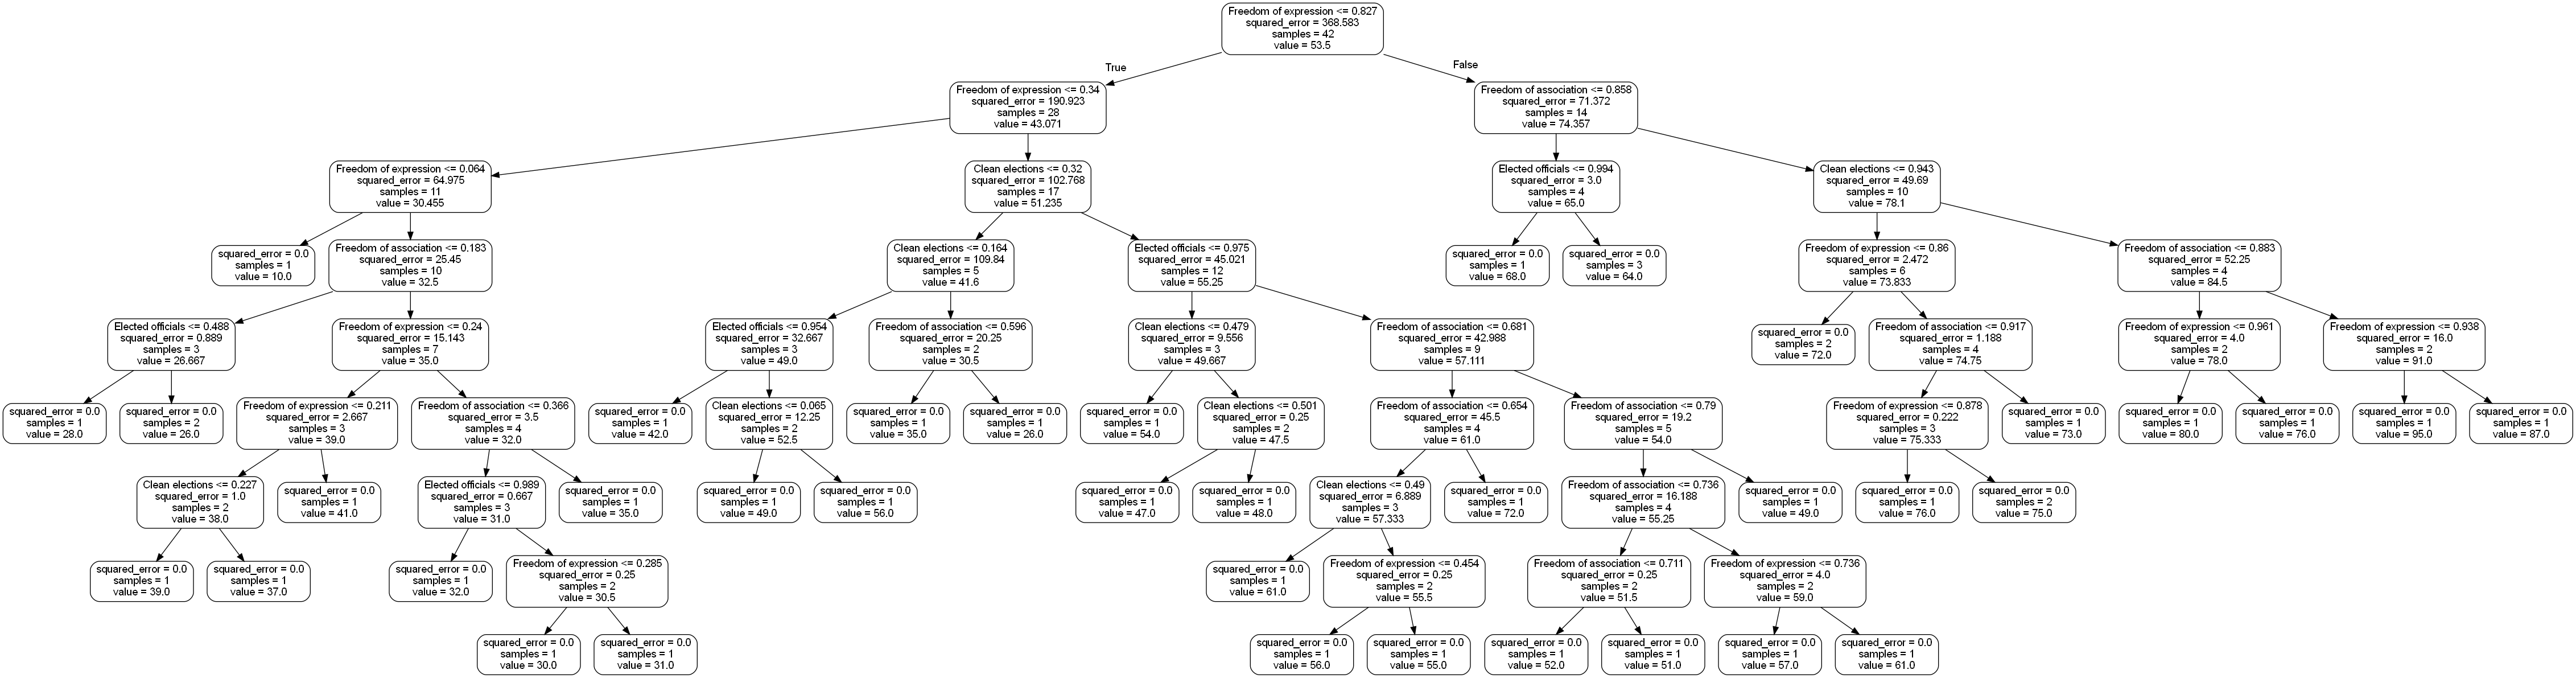

In [70]:
from IPython.display import Image

Image(filename='results/dtr.png')

##### How to interpret the tree

...

One way to address the overfitting problem with decision trees is to **prune** them.
Remember that the model *always* asks the most informative question first. This means
that as the trees get deeper and deeper (as we ask more questions), each feature is
weaker or less predictive than those that came before it. As we move further and further
out, we risk making decisions based on noise and overfitting the model to the data we
have. The full tree, then, is typically *worse* than a pruned tree because it includes weak
features that could be specific to our dataset and which do not generalize.

We constrain the depth of the tree by restricting the number of questions or decisions
that the model is allowed to ask, and in doing so, we improve the ability of our model to
generalize to data it hasn’t seen before. If we set the maximum depth of our tree to 6,
for example, the models can only ask the six most informative questions, at which point
it must make its prediction. Obviously, this reduces the accuracy on the training data,
but not as much as you might think. It’s the unseen data we care most about, and the
pruned model will make much better predictions when it is not overfitted.

In Sklearn, we specify the maximum depth of the tree in advance. This can be done using the `max_depth` argument for the `DecisionTreeClassifier()`. Let’s set it to 3. This will produce a very shallow tree, but that’s desirable; we want it to have to make the best decisions it can in broad strokes. This way, the model will be less likely to overfit the training data.

In [71]:
depths = range(1, 9)

dtr_scores_train = []
dtr_scores_test = []

for depth in depths:
    _ = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X=X_regression_train, y=y_regression_train)
    dtr_scores_train.append(_.score(X=X_regression_train, y=y_regression_train))
    dtr_scores_test.append(_.score(X=X_regression_test, y=y_regression_test))

dtr_scores = pd.DataFrame(
    zip(depths, dtr_scores_train, dtr_scores_test), 
    columns = ['Maximum depth', 'Training score', 'Test score'])

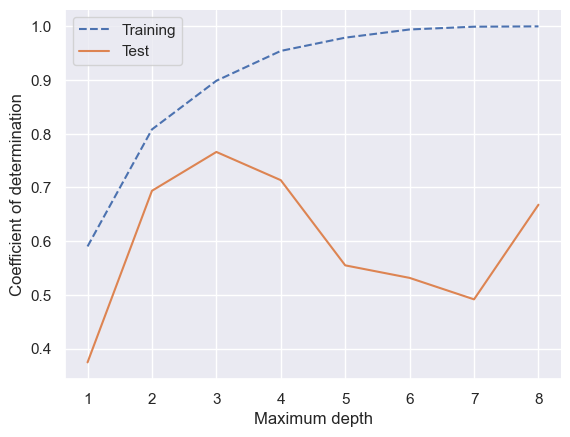

In [72]:
fig, ax = plt.subplots()
#ax.axhline(lr_score_cv.mean(), label='Linear', linestyle='dotted', color='darkgray')
sns.lineplot(x='Maximum depth', y='Training score', data=dtr_scores, label='Training', linestyle='dashed')
sns.lineplot(x='Maximum depth', y='Test score', data=dtr_scores, label='Test', linestyle='solid')
ax.set(xlabel='Maximum depth', ylabel='Coefficient of determination')
sns.despine()
ax.legend()
plt.show()

In [73]:
# create DecisionTreeRegressor object and regress y on X
dtr_pruned = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X=X_regression_train, y=y_regression_train)

In [74]:
#dtr_pruned.fit(X=X_regression_train, y=y_regression_train)
export_graphviz(
    decision_tree = dtr_pruned,
    out_file = 'results/dtr_pruned.dot', 
    filled = False,
    rounded = True,
    feature_names = indices_labels
)

We’ve already seen a modest improvement, which probably represents a
slight reduction in overfitting (something that cross-validation automatically assesses).
Let’s examine the tree again:


In [75]:
G_dtr_pruned = AGraph()
G_dtr_pruned.read(path='results/dtr_pruned.dot')
G_dtr_pruned.draw(path='results/dtr_pruned.png', prog='dot')

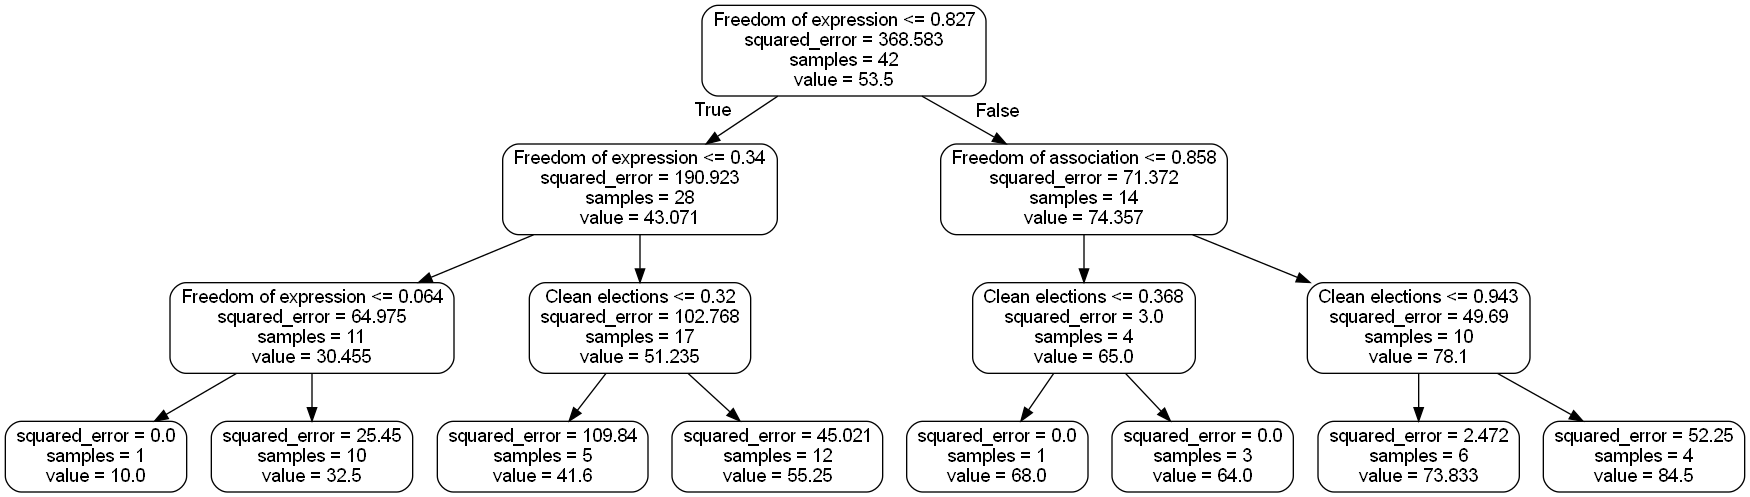

In [76]:
Image(filename='results/dtr_pruned.png')

You can see the influence of setting the `max_depth` parameter to 3 in the tree: rather
than a sprawling monstrosity, we now have a tree that neatly terminates each branch at
the same level. Decision trees have other parameters you can tweak, such as `min_samples_leaf`; it’s worth looking at the documentation to see the options available to you! Using only `max_depth`, we managed to get a good result, but we’re unlikely to be able to do much better using regularization alone. As we saw with ridge
and lasso regression, regularization usually reaches a "sweet spot" at some modest
value, but as the strength of the regularization increases, the model’s performance
nosedives. Decision trees have, by their nature, low granularity. You can’t perform fine-grained regularization on a single decision tree the same way you could for an `alpha`
parameter on a ridge or lasso regression (what would a `max_depth` of 3.5 even look
like?). It’s likely that no regularization of a single-tree model will eliminate overfitting
entirely. Instead, we’ll have to turn to a method which will allow us to combine many,
many trees.

In [77]:
# get scores
dtr_pruned_score_train = dtr_pruned.score(X=X_regression_train, y=y_regression_train).round(3)
dtr_pruned_score_cv = cross_val_score(estimator=DecisionTreeRegressor(max_depth=3, random_state=42), X=X_regression_train, y=y_regression_train, cv=shufflesplit)
dtr_pruned_score_test = dtr_pruned.score(X=X_regression_test, y=y_regression_test).round(3)

# display scores
vdem_regression_scores.loc[:, 'Decision Tree (pruned)'] = [dtr_pruned_score_train, f'{dtr_pruned_score_cv.mean().round(3)} ({dtr_pruned_score_cv.std().round(3)})', dtr_pruned_score_test]
vdem_regression_scores

,Linear,Ridge (best),Multi-Layer Perceptron,Decision Tree (pruned)
Training,0.817,0.817,0.839,0.899
Cross-Validation,-13.975 (29.628),0.86 (0.057),0.844 (0.058),0.713 (0.186)
Test,0.807,0.808,0.783,0.766


MENTION https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html AND https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html AND WHY GRADIENT BOOSTED MACHINES ARE CONSIDERED BETTER

#### Gradient Boosted Machines

While random forests remain one of the best and most widely used approaches to
supervised machine learning, a slightly newer approach to ensembling decision trees
has recently started outperforming random forests and is widely considered to be one of
the best algorithms for doing machine learning on anything other than image or
perception data (Chollet, 2018). This technique is called **gradient boosting**, and it
differs from the random forest approach in that rather than allowing all of the decision
trees to randomly pursue the best answer possible in isolation (as random forest does),
it attempts to fit trees that better account for the misclassified observations from
previous trees. In this way, each tree tackles the *room for improvement* left behind by
the tree that immediately preceded it. The effect here is that the gradient-boosted trees
can reach a remarkably high degree of accuracy using only a small handful of
estimators (but are accordingly prone to overfitting). Let’s try creating one now:

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostingRegressor object and regress y on X
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42).fit(X=X_regression_train, y=y_regression_train)

# get scores
gbr_score_train = gbr.score(X=X_regression_train, y=y_regression_train).round(3)
gbr_score_cv = cross_val_score(estimator=GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42), X=X_regression_train, y=y_regression_train, cv=shufflesplit)
gbr_score_test = gbr.score(X=X_regression_test, y=y_regression_test).round(3)

# display scores
vdem_regression_scores.loc[:, 'Gradient Boosting'] = [gbr_score_train, f'{gbr_score_cv.mean().round(3)} ({gbr_score_cv.std().round(3)})', gbr_score_test]
vdem_regression_scores

,Linear,Ridge (best),Multi-Layer Perceptron,Decision Tree (pruned),Gradient Boosting
Training,0.817,0.817,0.839,0.899,0.998
Cross-Validation,-13.975 (29.628),0.86 (0.057),0.844 (0.058),0.713 (0.186),0.771 (0.132)
Test,0.807,0.808,0.783,0.766,0.823


In [79]:
# interpretibility of GradientBoostingRegressor


#### Model selection

- By interpretability
- By predictive accuracy

The gradient-boosted trees achieved worse performance than our previous two models.
Usually, we would expect a gradient-boosted trees model to outperform all of our other
decision tree models (ensemble or otherwise), but that shouldn’t be interpreted as a
good reason to skip straight to gradient boost without bothering to specify and fit any
other models. What we’ve seen here is evidence to that point; there is value in fitting
*intermediate* models to see how their performance and idiosyncrasies compare to the
cutting-edge techniques. There are a few reasons why this is a vital practice.

- *Advanced, complicated methods are not intrinsically better than simple methods*: not
only is this true in our example – given that one of the most demonstrably powerful and
widely applicable algorithms, gradient boosting, failed to outperform random forests –
but it is often true in general. Cutting-edge methods are indispensable for their ability to
tackle cutting-edge issues, but they’re often overkill for the kinds of problems they get
applied to.

- *Don’t sacrifice interpretability without good cause*: explicable, interpretable, transparent
models that slightly underperform are often more valuable than top-performing ‘black
box’ models that appear to be more accurate, but for reasons that are hard to establish.
Gradient-boosted models are more difficult to interpret than decision tree models, so the
advantages of the former over the latter should be considered in light of the
interpretability trade-off.

- *Any problem in machine learning should be tackled using multiple approaches*: even if
you feel like you can’t improve on your model, there may be undiscovered issues lurking
beneath the surface. Applying a multitude of modelling strategies to a problem – even in
cases where your first model is performing well – may help confirm the defensibility of
your primary approach, give you more inferential insight, or uncover contingencies that
need to be addressed.

One problem common to all tree-based models (ensemble or otherwise) is that they
require an abundance of data and are especially prone to overfitting in cases where
such data is not forthcoming. There are different ways to make up for a lack of
data.

In [80]:
vdem_regression_scores.loc['Overfitting ratio'] = (vdem_regression_scores.loc['Training'].astype(float) / vdem_regression_scores.loc['Test'].astype(float)).round(2)
vdem_regression_scores.loc['Interpretability'] = ['++', '+', '-', '++', '--']
vdem_regression_scores

,Linear,Ridge (best),Multi-Layer Perceptron,Decision Tree (pruned),Gradient Boosting
Training,0.817,0.817,0.839,0.899,0.998
Cross-Validation,-13.975 (29.628),0.86 (0.057),0.844 (0.058),0.713 (0.186),0.771 (0.132)
Test,0.807,0.808,0.783,0.766,0.823
Overfitting ratio,1.01,1.01,1.07,1.17,1.21
Interpretability,++,+,-,++,--


All predictions so far are based on a train/test split with `random_state=42`. How do scores change if we allow splits to differ? In other words, how robust are the results we have obtained so far? The following plot shows the test scores for 100 runs:

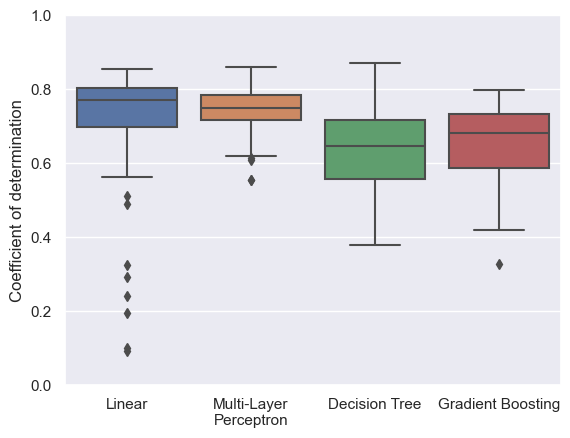

In [81]:
# run 100 regressions for 4 regressors each without a defined random state in data splitting
regressors = [LinearRegression(fit_intercept=False), MLPRegressor(), DecisionTreeRegressor(max_depth=3), GradientBoostingRegressor()]
regressor_scores_test = []
for i in range(100):
    _ = []
    for j in range(len(regressors)):
        X_regression_loop_train, X_regression_loop_test, y_regression_loop_train, y_regression_loop_test = train_test_split(X_regression_z, y_regression_z, test_size=.5, shuffle=True)
        regressor = regressors[j].fit(X=X_regression_loop_train, y=y_regression_loop_train)
        _.append(regressor.score(X=X_regression_loop_test, y=y_regression_loop_test))
    regressor_scores_test.append(_)

# store coefficients of determination in dataframe
regressor_scores_test = pd.DataFrame(data=regressor_scores_test, columns=['Linear', 'Multi-Layer\nPerceptron', 'Decision Tree', 'Gradient Boosting'])

# plot coefficients of determination
sns.boxplot(data=regressor_scores_test)
plt.ylabel('Coefficient of determination')
plt.ylim([0, 1])
plt.show()

### D5.2.2. Classification

## References

### Recommended readings

<a id='deveaux_machine_2022'></a>
De Veaux, R. D. & Eck, A. (2022). "Machine Learning methods for Computational Social Science." In: Engel, U. & Quan-Haase, A. (eds). *Handbook of Computational Social Science*, vol. 2, p. 291–321. Abingdon: Routledge. https://doi.org/10.4324/9781003025245.

<a id='mclevey_doing_2022'></a>
McLevey, J. (2022). *Doing Computational Social Science: A Practical Introduction*. SAGE. https://us.sagepub.com/en-us/nam/doing-computational-social-science/book266031. *A rather complete introduction to the field with well-structured and insightful chapters also on supervised Machine Learning. The [website](https://github.com/UWNETLAB/dcss_supplementary) offers the code used in the book. For this session, read **chs. 20, 21, and 22** on linear models, decision-tree-based models, and deep learning.**

### Complementary readings

Breiman, L. (2001). "Statistical modeling: The two cultures." *Statistal Science* 16:199–231. https://doi.org/10.1214/ss/1009213726.

Efron, B. & Hastie, T. (2016). *Computer Age Statistical Inference: Algorithms, Evidence, and Data Science*. Cambridge University Press. *http://www.cambridge.org/9781107149892*

Grimmer, J. *et al.* (2021). "Machine learning for social science: An agnostic approach." *Annual Review of Political Science* 24:395–419. https://doi.org/10.1146/annurev-polisci-053119-015921.

Hofman, J. M., Watts, D. J., *et al.* (2021). "Integrating explanation and prediction in computational social science." *Nature* 595:181–188. https://doi.org/10.1038/s41586-021-03659-0.

Molina, M. & Garip, F. (2019). *Annual Review of Sociology* 45:27–45. https://doi.org/10.1146/annurev-soc-073117-041106.

Molnar, C. (2022). *Interpretable Machine Learning: A Guide for Making Black Box Models Explainable*. Leanpub. *[Website](https://leanpub.com/interpretable-machine-learning)*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz & Pouria Mirelmi

Version date: 18 August 2023

License: Creative Commons Attribution 4.0 International (CC BY 4.0)
</div>

#### Notes to be removed before publication

- Check https://doi.org/10.1145/1150402.1150412
- add cvxopt=1.2.6 to environment.yml -- NOT NECSSARY ANYMORE CAUSE WE DON'T USE method=sqrt_lasso IN statsmodels RIDGE REGRESSION ANYMORE
- https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py
- ...